In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_dir = 'cifar10/train/'
test_data_dir = 'cifar10/test/'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=train_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=test_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
# number of classes
K = len(set(y_train))
# calculate total number of classes 
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10


In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 179s 283ms/step - loss: 1.7342 - accuracy: 0.4114 - val_loss: 1.4389 - val_accuracy: 0.4940
Epoch 2/10
625/625 [==============================] - 201s 322ms/step - loss: 1.2330 - accuracy: 0.5604 - val_loss: 1.3314 - val_accuracy: 0.5275
Epoch 3/10
625/625 [==============================] - 185s 296ms/step - loss: 1.0362 - accuracy: 0.6266 - val_loss: 1.0253 - val_accuracy: 0.6325
Epoch 4/10
625/625 [==============================] - 178s 284ms/step - loss: 0.8945 - accuracy: 0.6805 - val_loss: 1.0977 - val_accuracy: 0.6170
Epoch 5/10
625/625 [==============================] - 183s 294ms/step - loss: 0.7907 - accuracy: 0.7171 - val_loss: 0.9553 - val_accuracy: 0.6720
Epoch 6/10
625/625 [==============================] - 168s 270ms/step - loss: 0.6994 - accuracy: 0.7526 - val_loss: 0.9097 - val_accuracy: 0.6850
Epoch 7/10
625/625 [==============================] - 172s 274ms/step - loss: 0.6116 - accuracy: 0.7831 - val_loss: 0.8601 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 [==============================] - 5s 75ms/step - loss: 0.8742 - accuracy: 0.7090
Loss:  0.8741945028305054
Accuracy:  0.7089999914169312


In [8]:
import matplotlib.pyplot as plt
y = to_categorical(y_test)
predicted_value = model.predict(x_test)

63/63 [==============================] - 6s 76ms/step


In [9]:
labels = list(test_generator.class_indices.keys())

Actual Number:  automobile
Predicted Number:  automobile


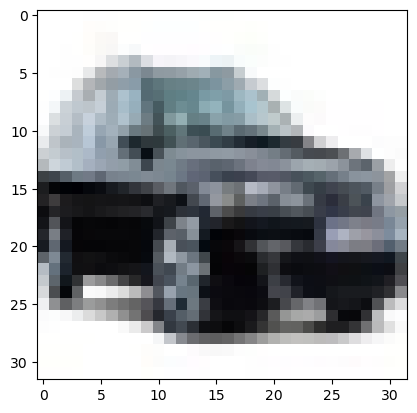

In [10]:
n = 10
plt.imshow(x_test[n])
print("Actual Number: ",labels[np.argmax(y[n])])
print("Predicted Number: ", labels[np.argmax(predicted_value[n])])

In [11]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
# Evaluate the network
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

5/5 [==============================] - 27s 5s/step - loss: 0.8339 - accuracy: 0.7232
Test accuracy: 0.7232133746147156


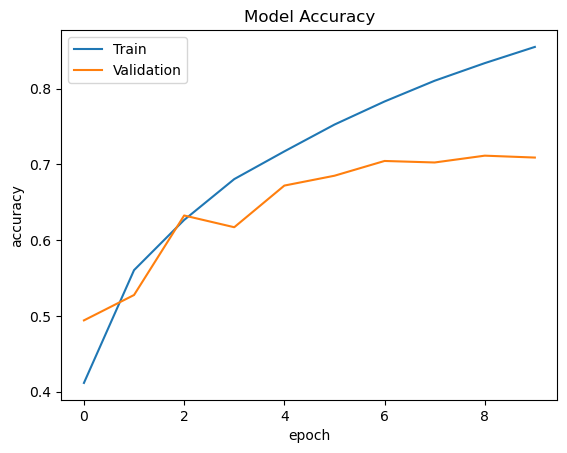

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

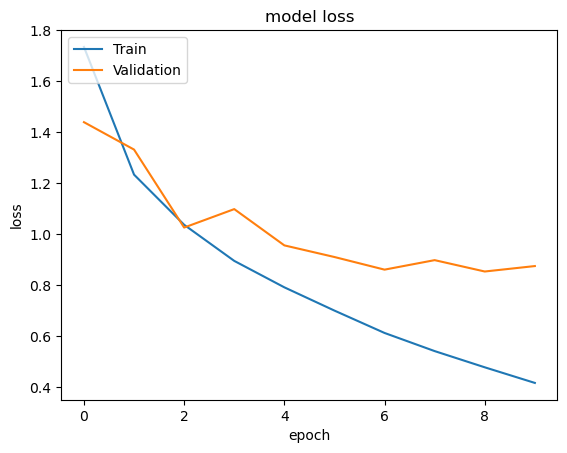

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

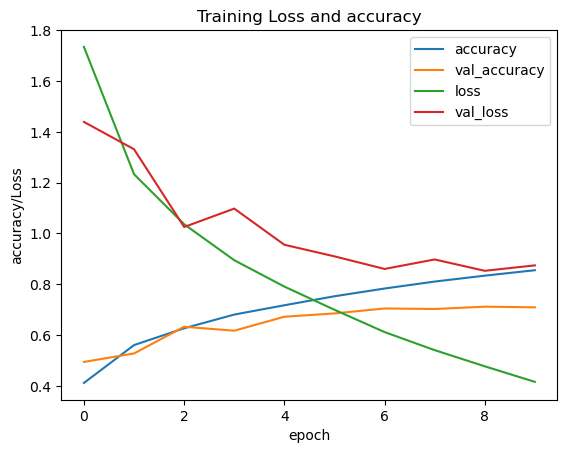

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])